In [1014]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d

%matplotlib inline

In [1149]:
def interpolate_streamwise(df_field, xloc, variable):
    grouped = df_field.sort_values(['x','y']).groupby("y")
    data = []
    for y, df in grouped:
        f2 = interp1d(df.x, df[variable], kind='cubic')
        data.append((float(y),float(f2(xloc))))
    df = pd.DataFrame(data, columns = ['y',variable])
    return df

In [568]:
def get_valdata(fname):
    Twall =28+273.15
    df_dns = pd.read_fwf(fname,widths=6*[18], header=None, names=['x','dummy1','dummy2','dummy3','T*','dummy4']) 
    df_dns['T']=df_dns['T*'].apply(lambda x: x*Twall -273.15)
    return df_dns

def get_numdata(fname):
    Twall =28+273.15
    df_field = pd.read_fwf(fname,widths=32*[20]) #the complete fi?eld
    df_field = df_field.rename(columns={"T": "T*",'x':"x_uncor"})
    df_field['LOD']=df_field['x_uncor'].max()
    df_field['x']  =df_field.apply(lambda x: x['x_uncor']-((nstart-1)/nelem)*x['LOD'],axis=1)
    df_field['T']  =df_field['T*'].apply(lambda x: x*Twall -273.15)
    df_wall = df_field[df_field['y']==0.5].copy()

    return df_field, df_wall


## Case A

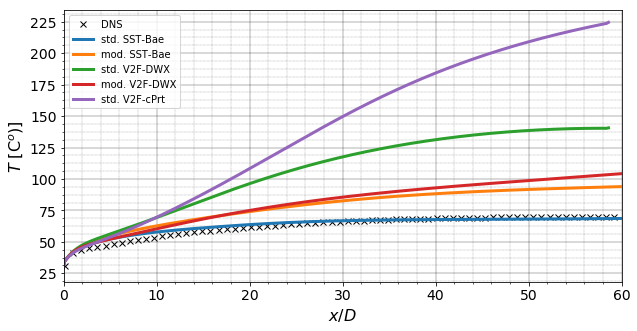

In [984]:
# df_dnsA = get_valdata( "validation_data/hassan_data/caseA")
# df_numfA1, df_numwA1 = get_numdata('../cA_SST_mod0_cPrt09.csv')
# df_numfA2, df_numwA2 = get_numdata('../cA_SST_mod0_Bae.csv')
# df_numfA3, df_numwA3 = get_numdata('../cA_SST_mod1_Bae.csv')
# df_numfA4, df_numwA4 = get_numdata('../cA_V2F_mod0_DWX.csv')
# df_numfA5, df_numwA5 = get_numdata('../cA_V2F_mod1_DWX.csv')
df_numfA6, df_numwA6 = get_numdata('../cA_V2F_mod0_cPrt.csv')
# df_numfA7, df_numwA7 = get_numdata('../laminarbl.csv')
                  
fig, ax = plt.subplots(figsize=(10,5))

df_dnsA.plot('x','T',ax=ax, color='k', marker='x',markevery=50, linestyle ='None', label='DNS')
# df_numwA1.plot('x','T',ax=ax,    label='$Pr_t=0.9$')
df_numwA2.plot('x','T',ax=ax,    label='std. SST-Bae', linewidth=3)
df_numwA3.plot('x','T',ax=ax,    label='mod. SST-Bae', linewidth=3)
df_numwA4.plot('x','T',ax=ax,    label='std. V2F-DWX', linewidth=3)
df_numwA5.plot('x','T',ax=ax,    label='mod. V2F-DWX', linewidth=3)
df_numwA6.plot('x','T',ax=ax,    label='std. V2F-cPrt', linewidth=3)
# df_numwA7.plot('x','T',ax=ax,    label='std. V2F-cPrt', linewidth=3)


ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$T$ [C$^o$)]',fontsize=16)
ax.minorticks_on()
ax.grid(which='minor',color='k', linestyle=':', linewidth=0.3)
ax.grid(which='major',color='k', linestyle='-', linewidth=0.3)
ax.tick_params(labelsize=14)
ax.set_xbound(0,60)
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


## Case B

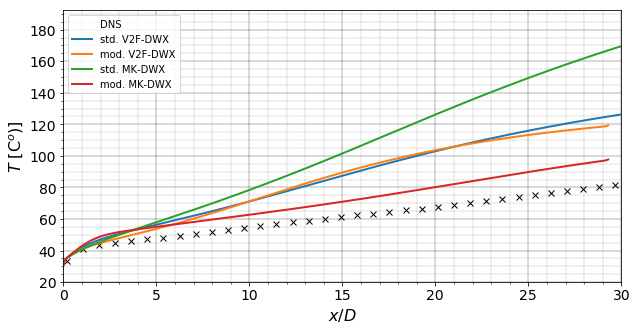

In [1212]:

df_dnsB = get_valdata( "validation_data/hassan_data/caseB")

# df_numfB1, df_numwB1 = get_numdata('../cB_SST_mod0_Bae.csv')
# df_numfB2, df_numwB2 = get_numdata('../cB_SST_mod1_Bae.csv')
# df_numfB3, df_numwB3 = get_numdata('../cB_V2F_mod0_DWX.csv')
# df_numfB4, df_numwB4 = get_numdata('../cB_V2F_mod1_DWX.csv')
#df_numfB5, df_numwB5 = get_numdata('../cB_V2F_mod0_cPrt.csv')
df_numfB6, df_numwB6 = get_numdata('../cB_MK_mod1_DWX.csv')
df_numfB7, df_numwB7 = get_numdata('../laminarbl.csv')



fig, ax = plt.subplots(figsize=(10,5))
lw = 2
df_dnsB.plot('x','T',ax=ax, color='k', marker='x',markevery=50, linestyle ='None', label='DNS')
# df_numwB1.plot('x','T',ax=ax,    label='std. SST-Bae', linewidth=lw)
# df_numwB2.plot('x','T',ax=ax,    label='mod. SST-Bae', linewidth=lw)
df_numwB3.plot('x','T',ax=ax,    label='std. V2F-DWX', linewidth=lw)
df_numwB4.plot('x','T',ax=ax,    label='mod. V2F-DWX', linewidth=lw)
df_numwB7.plot('x','T',ax=ax,    label='std. MK-DWX' , linewidth=lw)
df_numwB6.plot('x','T',ax=ax,    label='mod. MK-DWX' , linewidth=lw)


ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$T$ [C$^o$)]',fontsize=16)
ax.minorticks_on()
ax.grid(which='minor',color='k', linestyle=':', linewidth=0.3)
ax.grid(which='major',color='k', linestyle='-', linewidth=0.3)
ax.tick_params(labelsize=14)
ax.set_xbound(0,30)


## Case C

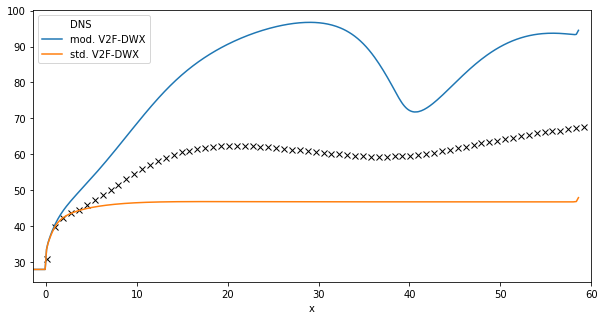

In [951]:
df_dnsC = get_valdata( "validation_data/hassan_data/caseC")
df_numfC1, df_numwC1 = get_numdata('../cC_V2F_mod1_DWX.csv')
df_numfC2, df_numwC2 = get_numdata('../laminarbl.csv')

fig, ax = plt.subplots(figsize=(10,5))
df_dnsC.plot('x','T',ax=ax, color='k', marker='x',markevery=50, linestyle ='None', label='DNS')
df_numwC1.plot('x','T',ax=ax,    label='mod. V2F-DWX')
df_numwC2.plot('x','T',ax=ax,    label='std. V2F-DWX')


In [993]:
df_numfC1['gk'].max()

1.030249739e-07

In [ ]:
fig,ax =plt.subplots(figsize=(10,5))
df_numfC1, df_numwC1 = get_numdata('../laminarbl.csv')
# df_numfC1, df_numwC1 = get_numdata('../cB_V2F_mod1_DWX.csv')

df_numfC1['absResKt']=np.log10(abs(df_numfC1['resKt']))
df_numfC1['absResEt']=np.log10(abs(df_numfC1['resEt']))
df_numfC1['logEt']=np.log10(df_numfC1['epst'])
df_numfC1['logKt']=np.log10(df_numfC1['kt'])
df_numfC1['logE']=np.log10(df_numfC1['eps'])
df_numfC1['logK']=np.log10(df_numfC1['k'])

df_numfC1.pivot('x', 'y')

dftmp = df_numfC1[df_numfC1['x']>0][df_numfC1['x']<=30][['x','y','keps']]
hdfpivot=dftmp.pivot('x', 'y')

X=hdfpivot.columns.levels[1].values
Y=hdfpivot.index.values
Z=hdfpivot.values
Xi,Yi = np.meshgrid(X, Y)
CS = ax.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet);
CB = fig.colorbar(CS)
ax.set_xbound(1,30)
ax.set_xlabel('$x/D$',fontsize=16)
ax.set_ylabel('$y$',fontsize=16,rotation=0)
CB.set_label("$B_k$",rotation=0, fontsize=16, labelpad=15)

#lines2, labels2 = ax21.get_legend_handles_labels()
# ax21.get_legend().remove()
CB.ax.tick_params(labelsize=14)
CB.formatter.set_powerlimits((0, 0))
CB.update_ticks()

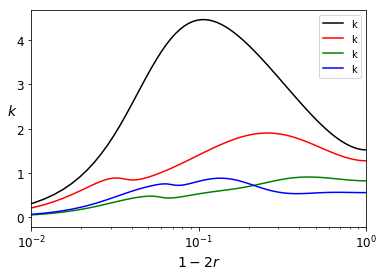

In [942]:
fig, ax = plt.subplots()
df_numfC1, df_numwC1 = get_numdata('../cC_V2F_mod1_DWX.csv')
df_numfC1['r']=  df_numfC1['y']
df_numfC1['ploty'] = 1 -2*df_numfC1['r']
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x'])<2e-1]['x'].unique()[-1]].iloc[1:].plot('ploty','k',ax=ax,color='k')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-7.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','k',ax=ax,color='r')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-15)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','k',ax=ax, color='green')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-22.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','k',ax=ax,color='blue')
ax.set_xscale('log')
ax.set_xbound(0.01,1)
ax.set_ylabel("$k$",rotation=0, fontsize=14)
ax.set_xlabel("$1-2r$", fontsize=14)
ax.tick_params(labelsize=12)

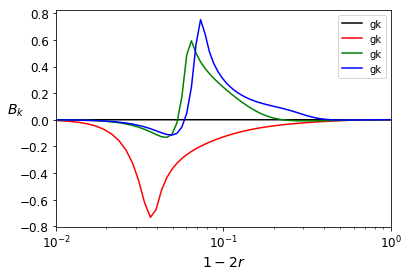

In [945]:
fig, ax = plt.subplots()
df_numfC1, df_numwC1 = get_numdata('../cC_V2F_mod1_DWX.csv')
df_numfC1['r']=  df_numfC1['y']
df_numfC1['ploty'] = 1 -2*df_numfC1['r']
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x'])<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','gk',ax=ax,color='k')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-7.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','gk',ax=ax,color='r')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-15)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','gk',ax=ax, color='green')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-22.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','gk',ax=ax,color='blue')
ax.set_xscale('log')
ax.set_xbound(0.01,1)
ax.set_ylabel("$B_k$",rotation=0, fontsize=14)
ax.set_xlabel("$1-2r$", fontsize=14)
ax.tick_params(labelsize=12)

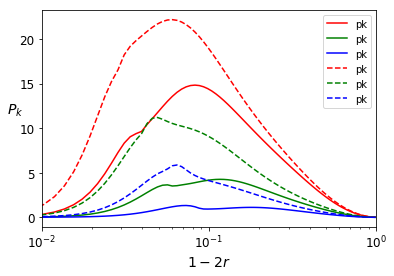

In [937]:
fig, ax = plt.subplots()
df_numfC1, df_numwC1 = get_numdata('../cB_V2F_mod0_DWX.csv')
df_numfC1['r']=  df_numfC1['y']
df_numfC1['ploty'] = 1 -2*df_numfC1['r']
# df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x'])<2e-1]['x'].unique()[-1]].iloc[1:].plot('ploty','pk',ax=ax,color='k')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-7.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax,color='r')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-15)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax, color='green')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-22.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax,color='blue')


df_numfC1, df_numwC1 = get_numdata('../cB_V2F_mod1_DWX.csv')
df_numfC1['r']=  df_numfC1['y']
df_numfC1['ploty'] = 1 -2*df_numfC1['r']
# df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x'])<2e-1]['x'].unique()[-1]].iloc[1:].plot('ploty','pk',ax=ax,color='k', linestyle='--')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-7.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax,color='r', linestyle='--')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-15)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax, color='green', linestyle='--')
df_numfC1[df_numfC1['x']==df_numfC1[abs(df_numfC1['x']-22.5)<2e-1]['x'].unique()[0]].iloc[1:].plot('ploty','pk',ax=ax,color='blue', linestyle='--')


ax.set_xscale('log')
ax.set_xbound(0.01,1)
ax.set_ylabel("$P_k$",rotation=0, fontsize=14)
ax.set_xlabel("$1-2r$", fontsize=14)
ax.tick_params(labelsize=12)